In [1]:
pip install umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import statsmodels.api as sm
import pathlib
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as po

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
plt.rc('font', family='NanumBarunGothic') 

In [5]:
df = pd.read_csv('/content/설문결과-Raw-Data.csv',sep=',')

In [6]:
df.columns = ['인식매체','경험','인식','관심도','지식','구성원동의','환경','비용지불의사','정부지원정책','犬성별','중성화','犬나이','털길이','품종','색상','크기','성격','공고기간','입양희망여부','ls1','ls2','조사 나이대','성별','d5','d6']
df

,인식매체,경험,인식,관심도,지식,구성원동의,환경,비용지불의사,정부지원정책,犬성별,...,크기,성격,공고기간,입양희망여부,ls1,ls2,조사 나이대,성별,d5,d6
0,1,1,2,3,4,2,2,5,4,2,...,3,2,4,1,4,1,61,1,3,NaN
1,1,1,4,5,4,4,5,4,4,1,...,4,4,4,2,1,2,26,1,3,NaN
2,1,1,2,4,4,2,2,4,4,1,...,3,2,3,2,3,1,46,1,3,NaN
3,1,2,3,2,2,3,2,2,2,2,...,3,4,4,3,3,1,53,2,6,NaN
4,1,2,3,2,2,3,3,4,4,2,...,3,3,3,2,2,1,41,2,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,2,3,2,3,3,2,2,4,2,...,3,3,3,2,3,1,30,2,3,NaN
296,1,1,5,5,3,4,4,4,4,2,...,3,3,3,3,3,2,67,2,4,NaN
297,1,1,3,4,4,4,3,4,4,1,...,2,3,3,3,1,3,45,1,3,NaN
298,1,1,2,3,1,2,3,2,1,2,...,1,1,1,3,2,2,43,1,3,NaN


In [7]:
real_df = df

In [8]:
idx = real_df[df["입양희망여부"] == 3].index     #  인덱스의 값이 저장됨
real_df.drop(idx , inplace=True) # 해당 인덱스를 제거함

In [9]:
old_range = {'경험':{2:0}, '인식매체':{2:0}, '입양희망여부' :{2:0}, '성별' : {2:0}, '犬성별' : {2:0}} # 0 입양안한다, 1 한다,    성별 - 0 = 여자, 1 = 남자 , 인식매체 0 오프라인, 1 온라인,  경험 0 아니오, 1 예
logi_df = real_df.replace(old_range)
logi_df

,인식매체,경험,인식,관심도,지식,구성원동의,환경,비용지불의사,정부지원정책,犬성별,...,크기,성격,공고기간,입양희망여부,ls1,ls2,조사 나이대,성별,d5,d6
0,1,1,2,3,4,2,2,5,4,0,...,3,2,4,1,4,1,61,1,3,NaN
1,1,1,4,5,4,4,5,4,4,1,...,4,4,4,0,1,2,26,1,3,NaN
2,1,1,2,4,4,2,2,4,4,1,...,3,2,3,0,3,1,46,1,3,NaN
4,1,0,3,2,2,3,3,4,4,0,...,3,3,3,0,2,1,41,0,2,NaN
5,1,1,4,5,4,5,3,5,4,1,...,2,3,5,1,3,4,29,0,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1,1,3,4,4,4,4,5,5,1,...,4,3,4,1,2,2,52,1,3,NaN
291,1,0,2,3,3,2,2,2,4,1,...,3,2,3,0,2,1,26,0,3,NaN
292,1,1,2,3,3,4,4,3,3,1,...,4,3,4,1,2,2,33,1,5,NaN
295,1,0,3,2,3,3,2,2,4,0,...,3,3,3,0,3,1,30,0,3,NaN


In [10]:
df1 = logi_df.drop(['d5','d6'],axis = 1)

In [11]:
df1['ls1'].unique()

array([4, 1, 3, 2])

In [12]:
df1['ls1'].value_counts()

3    69
2    68
4    34
1    33
Name: ls1, dtype: int64

In [13]:
df1['ls2'].value_counts()

1    98
2    81
4    15
3    10
Name: ls2, dtype: int64

In [14]:
mom_df = df1.drop(['인식매체','경험','인식','관심도','지식','구성원동의','정부지원정책','犬성별','중성화','犬나이','털길이','품종','성격','공고기간','ls1','ls2'],axis=1)

In [15]:
mom_df

,환경,비용지불의사,색상,크기,입양희망여부,조사 나이대,성별
0,2,5,4,3,1,61,1
1,5,4,3,4,0,26,1
2,2,4,3,3,0,46,1
4,3,4,4,3,0,41,0
5,3,5,4,2,1,29,0
...,...,...,...,...,...,...,...
289,4,5,3,4,1,52,1
291,2,2,3,3,0,26,0
292,4,3,5,4,1,33,1
295,2,2,4,3,0,30,0


In [16]:
mom_df.describe()

,환경,비용지불의사,색상,크기,입양희망여부,조사 나이대,성별
count,204.000000,204.000000,204.000000,204.000000,204.00000,204.000000,204.000000
mean,2.774510,3.147059,3.455882,2.852941,0.50000,41.264706,0.485294
std,1.152482,1.198497,0.894986,1.077280,0.50123,10.443775,0.501013
min,1.000000,1.000000,1.000000,1.000000,0.00000,19.000000,0.000000
25%,2.000000,2.000000,3.000000,2.000000,0.00000,33.750000,0.000000
50%,3.000000,3.000000,3.000000,3.000000,0.50000,40.500000,0.000000
75%,4.000000,4.000000,4.000000,4.000000,1.00000,49.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,1.00000,68.000000,1.000000


In [17]:
data_1 = mom_df.drop(['크기','색상'],axis = 1)

In [18]:
g1 = data_1.loc[df['ls1'] == 1] #1그룹  , 여가가치 투자형
g2 = data_1.loc[df['ls1'] == 2] #2그룹  , 개인여가 지향형
g3 = data_1.loc[df['ls1'] == 3] #3그룹  , 가족 중심 여가추구형
g4 = data_1.loc[df['ls1'] == 4] #4그룹  , 여가 갈망형

#산점도

In [178]:
g1

,환경,비용지불의사,입양희망여부,조사 나이대,성별
1,5,4,0,26,1
8,2,2,0,44,1
9,3,4,1,25,1
10,4,3,1,45,1
13,3,4,1,35,1
14,4,3,1,42,1
15,4,4,1,49,1
16,4,4,1,39,1
31,4,5,1,51,0
52,3,4,1,41,1


In [177]:
g1.count()

환경        33
비용지불의사    33
입양희망여부    33
조사 나이대    33
성별        33
dtype: int64

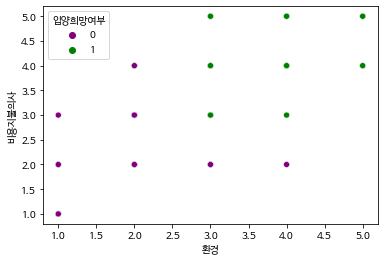

In [45]:
sns.scatterplot(x='환경', y='비용지불의사', hue='입양희망여부',
                palette=['purple', 'green'], data=g3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fdc90a460>,
      dtype=object)

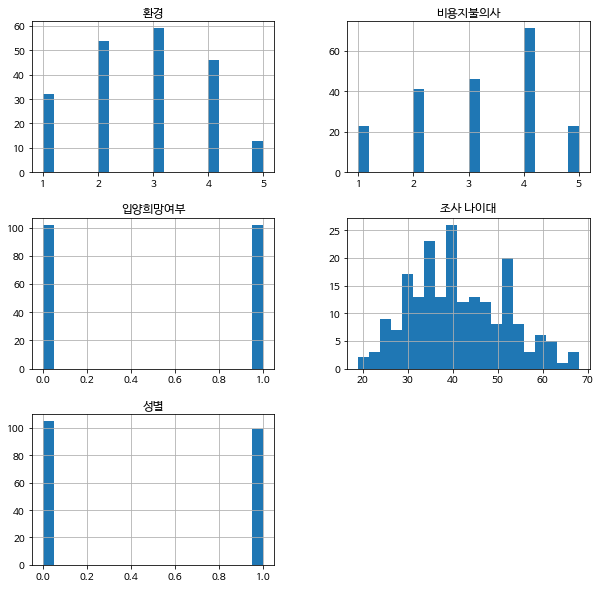

In [46]:
data_1.hist(bins=20, figsize=(10,10))

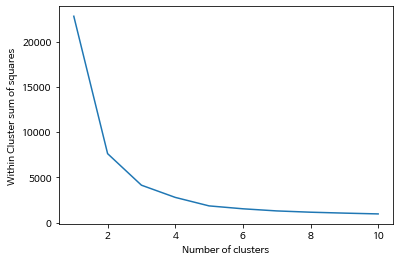

In [47]:
from sklearn.cluster import KMeans # elbow값 찾아서 클러스터 중심 값 찾으려고 했음
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(data_1)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster sum of squares')
plt.show()

Text(28.74123263888889, 0.5, '비용지불의사')

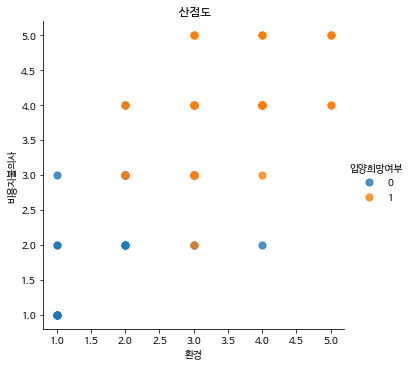

In [48]:
sns.lmplot(x='환경', y='비용지불의사', data=g3, fit_reg=False, scatter_kws={"s": 50},hue='입양희망여부')
plt.title(' 산점도')
plt.xlabel('환경')
plt.ylabel('비용지불의사')

In [49]:
points = g3.values
kmeans = KMeans(n_clusters=3).fit(points)
# 각 클러스터들의 중심 위치 구할 수 있게 하기
kmeans.cluster_centers_

array([[ 2.88888889,  3.22222222,  0.55555556, 31.27777778,  0.16666667],
       [ 3.        ,  3.44      ,  0.6       , 55.68      ,  0.56      ],
       [ 2.73076923,  3.15384615,  0.53846154, 42.96153846,  0.61538462]])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

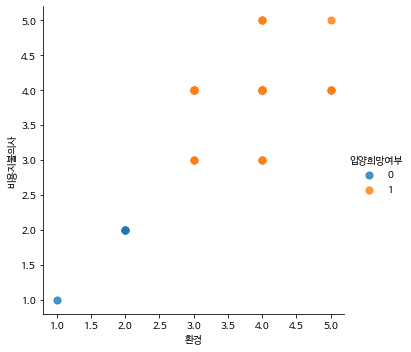

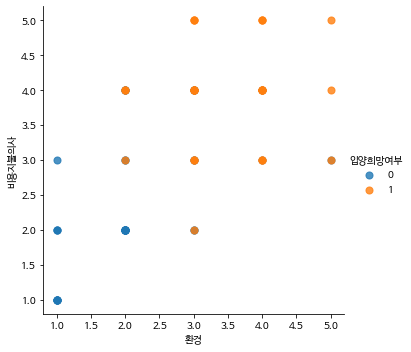

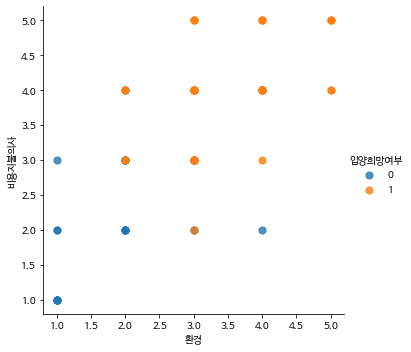

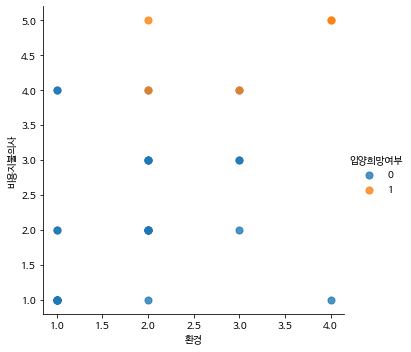

In [50]:
sns.lmplot('환경', '비용지불의사', data=g1, fit_reg=False, scatter_kws={"s": 50}, hue='입양희망여부')
sns.lmplot('환경', '비용지불의사', data=g2, fit_reg=False, scatter_kws={"s": 50}, hue='입양희망여부')
sns.lmplot('환경', '비용지불의사', data=g3, fit_reg=False, scatter_kws={"s": 50}, hue='입양희망여부')
sns.lmplot('환경', '비용지불의사', data=g4, fit_reg=False, scatter_kws={"s": 50}, hue='입양희망여부')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

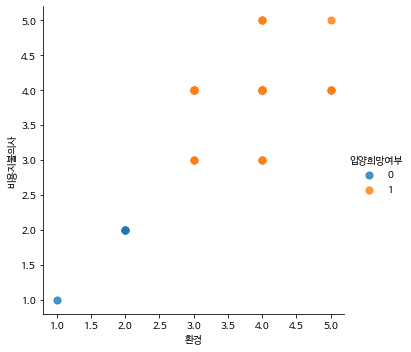

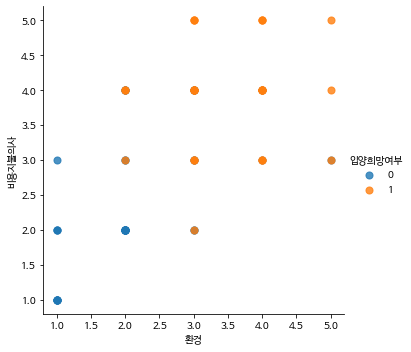

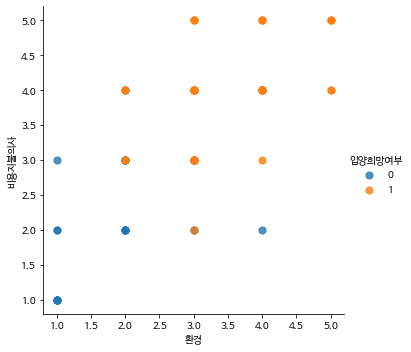

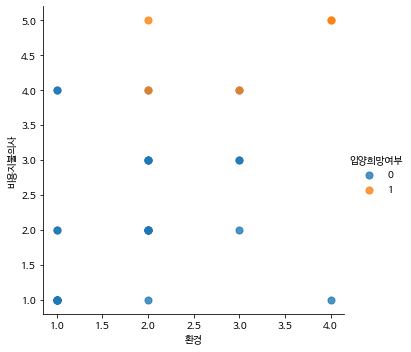

In [51]:
g = [g1,g2,g3,g4]
for i in range(4):
  sns.lmplot('환경', '비용지불의사', data=g[i], fit_reg=False, scatter_kws={"s": 50}, hue='입양희망여부')

#라이프스타일1

In [63]:
groups = logi_df.groupby('ls1')

In [64]:
groups.count()

,인식매체,경험,인식,관심도,지식,구성원동의,환경,비용지불의사,정부지원정책,犬성별,...,색상,크기,성격,공고기간,입양희망여부,ls2,조사 나이대,성별,d5,d6
ls1,,,,,,,,,,,,,,,,,,,,,
1,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,1
2,68,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,68,68,2
3,69,69,69,69,69,69,69,69,69,69,...,69,69,69,69,69,69,69,69,69,1
4,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,4


In [65]:
sample_df = groups.size()
sample_df

ls1
1    33
2    68
3    69
4    34
dtype: int64

In [66]:
groups.count()

,인식매체,경험,인식,관심도,지식,구성원동의,환경,비용지불의사,정부지원정책,犬성별,...,색상,크기,성격,공고기간,입양희망여부,ls2,조사 나이대,성별,d5,d6
ls1,,,,,,,,,,,,,,,,,,,,,
1,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,1
2,68,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,68,68,2
3,69,69,69,69,69,69,69,69,69,69,...,69,69,69,69,69,69,69,69,69,1
4,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,4


In [83]:
clu_data1 = groups.mean()
clu_data1

,인식매체,경험,인식,관심도,지식,구성원동의,환경,비용지불의사,정부지원정책,犬성별,...,품종,색상,크기,성격,공고기간,입양희망여부,ls2,조사 나이대,성별,d5
ls1,,,,,,,,,,,,,,,,,,,,,
1,0.969697,0.878788,3.212121,3.909091,3.545455,3.545455,3.484848,3.606061,3.666667,0.515152,...,3.787879,3.393939,3.272727,3.121212,3.272727,0.787879,2.151515,42.363636,0.636364,3.272727
2,0.955882,0.705882,3.367647,3.338235,3.000000,3.220588,2.735294,3.117647,3.588235,0.426471,...,3.779412,3.573529,3.029412,2.955882,3.264706,0.470588,1.573529,37.588235,0.426471,3.294118
3,0.869565,0.710145,3.318841,3.507246,3.231884,3.217391,2.869565,3.275362,3.768116,0.550725,...,3.855072,3.420290,2.565217,2.826087,3.188406,0.565217,1.811594,44.521739,0.478261,3.681159
4,0.794118,0.617647,3.205882,2.882353,2.705882,2.676471,1.970588,2.500000,3.529412,0.382353,...,3.676471,3.352941,2.676471,2.705882,3.147059,0.147059,1.382353,40.941176,0.470588,2.911765


In [88]:
clu_data = clu_data1.drop(['ls2','조사 나이대','성별','d5'],axis = 1)

In [89]:
trans_dat = clu_data.transpose()

In [90]:
trans_dat.columns

Int64Index([1, 2, 3, 4], dtype='int64', name='ls1')

In [91]:
trans_dat

ls1,1,2,3,4
인식매체,0.969697,0.955882,0.869565,0.794118
경험,0.878788,0.705882,0.710145,0.617647
인식,3.212121,3.367647,3.318841,3.205882
관심도,3.909091,3.338235,3.507246,2.882353
지식,3.545455,3.000000,3.231884,2.705882
구성원동의,3.545455,3.220588,3.217391,2.676471
환경,3.484848,2.735294,2.869565,1.970588
비용지불의사,3.606061,3.117647,3.275362,2.500000
정부지원정책,3.666667,3.588235,3.768116,3.529412
犬성별,0.515152,0.426471,0.550725,0.382353


In [92]:
trans_dat.columns=['여가가치 투자형','개인여가 지향형','가족 중심 여가추구형','여가 갈망형']

In [93]:
trans_dat

,여가가치 투자형,개인여가 지향형,가족 중심 여가추구형,여가 갈망형
인식매체,0.969697,0.955882,0.869565,0.794118
경험,0.878788,0.705882,0.710145,0.617647
인식,3.212121,3.367647,3.318841,3.205882
관심도,3.909091,3.338235,3.507246,2.882353
지식,3.545455,3.000000,3.231884,2.705882
구성원동의,3.545455,3.220588,3.217391,2.676471
환경,3.484848,2.735294,2.869565,1.970588
비용지불의사,3.606061,3.117647,3.275362,2.500000
정부지원정책,3.666667,3.588235,3.768116,3.529412
犬성별,0.515152,0.426471,0.550725,0.382353


In [100]:
cluster1_df = trans_dat.drop(['인식매체','경험','구성원동의','인식','색상','크기','관심도','지식','정부지원정책','犬성별','중성화','犬나이','털길이','품종','성격','공고기간'],axis=0)
cluster1_df

,여가가치 투자형,개인여가 지향형,가족 중심 여가추구형,여가 갈망형
환경,3.484848,2.735294,2.869565,1.970588
비용지불의사,3.606061,3.117647,3.275362,2.500000
입양희망여부,0.787879,0.470588,0.565217,0.147059


In [101]:
trans_dat1 = trans_dat.reset_index(drop=True)

In [105]:
trans_dat1

,여가가치 투자형,개인여가 지향형,가족 중심 여가추구형,여가 갈망형
0,0.969697,0.955882,0.869565,0.794118
1,0.878788,0.705882,0.710145,0.617647
2,3.212121,3.367647,3.318841,3.205882
3,3.909091,3.338235,3.507246,2.882353
4,3.545455,3.000000,3.231884,2.705882
5,3.545455,3.220588,3.217391,2.676471
6,3.484848,2.735294,2.869565,1.970588
7,3.606061,3.117647,3.275362,2.500000
8,3.666667,3.588235,3.768116,3.529412
9,0.515152,0.426471,0.550725,0.382353


# lifstyle2

In [185]:
grouped = logi_df.groupby('ls2')

In [187]:
ls2_df = grouped.mean()
ls2_df

,인식매체,경험,인식,관심도,지식,구성원동의,환경,비용지불의사,정부지원정책,犬성별,...,품종,색상,크기,성격,공고기간,입양희망여부,ls1,조사 나이대,성별,d5
ls2,,,,,,,,,,,,,,,,,,,,,
1,0.846939,0.602041,3.061224,3.020408,2.785714,2.714286,2.244898,2.704082,3.448980,0.397959,...,3.673469,3.336735,2.469388,2.622449,2.928571,0.346939,2.826531,42.448980,0.459184,3.408163
2,0.950617,0.814815,3.493827,3.740741,3.395062,3.580247,3.222222,3.518519,3.864198,0.580247,...,3.925926,3.604938,3.246914,3.172840,3.518519,0.679012,2.123457,40.851852,0.555556,3.333333
3,0.900000,0.900000,3.600000,3.600000,3.400000,3.500000,3.200000,3.500000,3.200000,0.300000,...,3.600000,3.100000,3.000000,3.100000,3.200000,0.400000,2.500000,36.800000,0.400000,3.000000
4,1.000000,0.866667,3.600000,4.066667,3.600000,3.866667,3.533333,3.800000,4.133333,0.533333,...,3.933333,3.666667,3.133333,3.066667,3.533333,0.600000,2.533333,38.733333,0.333333,3.400000


In [192]:
lifestyle_df = ls2_df.drop(['인식매체','경험','구성원동의','인식','색상','크기','관심도','지식','정부지원정책','犬성별','중성화','犬나이','털길이','품종','성격','공고기간','ls1','d5'],axis=1)
lifestyle_df

,환경,비용지불의사,입양희망여부,조사 나이대,성별
ls2,,,,,
1,2.244898,2.704082,0.346939,42.448980,0.459184
2,3.222222,3.518519,0.679012,40.851852,0.555556
3,3.200000,3.500000,0.400000,36.800000,0.400000
4,3.533333,3.800000,0.600000,38.733333,0.333333


In [201]:
lifestyle_df1 = lifestyle_df.transpose()

In [203]:
lifestyle_df1.columns=(['실용주의형','감성형','이미지형','외향형'])

In [204]:
lifestyle_df1

,실용주의형,감성형,이미지형,외향형
환경,2.244898,3.222222,3.2,3.533333
비용지불의사,2.704082,3.518519,3.5,3.800000
입양희망여부,0.346939,0.679012,0.4,0.600000
조사 나이대,42.448980,40.851852,36.8,38.733333
성별,0.459184,0.555556,0.4,0.333333


# kmeans 군집화 중도 포기

In [23]:
df1

,인식매체,경험,인식,관심도,지식,구성원동의,환경,비용지불의사,정부지원정책,犬성별,...,품종,색상,크기,성격,공고기간,입양희망여부,ls1,ls2,조사 나이대,성별
0,1,1,2,3,4,2,2,5,4,0,...,4,4,3,2,4,1,4,1,61,1
1,1,1,4,5,4,4,5,4,4,1,...,4,3,4,4,4,0,1,2,26,1
2,1,1,2,4,4,2,2,4,4,1,...,4,3,3,2,3,0,3,1,46,1
4,1,0,3,2,2,3,3,4,4,0,...,4,4,3,3,3,0,2,1,41,0
5,1,1,4,5,4,5,3,5,4,1,...,4,4,2,3,5,1,3,4,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1,1,3,4,4,4,4,5,5,1,...,4,3,4,3,4,1,2,2,52,1
291,1,0,2,3,3,2,2,2,4,1,...,3,3,3,2,3,0,2,1,26,0
292,1,1,2,3,3,4,4,3,3,1,...,5,5,4,3,4,1,2,2,33,1
295,1,0,3,2,3,3,2,2,4,0,...,4,4,3,3,3,0,3,1,30,0


In [24]:
group1 = df1.loc[df['ls1'] == 1] #1그룹  , 여가가치 투자형
group2 = df1.loc[df['ls1'] == 2] #2그룹  , 개인여가 지향형
group3 = df1.loc[df['ls1'] == 3] #3그룹  , 가족 중심 여가추구형
group4 = df1.loc[df['ls1'] == 4] #4그룹  , 여가 갈망형

In [29]:
group1.columns

Index(['인식매체', '경험', '인식', '관심도', '지식', '구성원동의', '환경', '비용지불의사', '정부지원정책',
       '犬성별', '중성화', '犬나이', '털길이', '품종', '색상', '크기', '성격', '공고기간', '입양희망여부',
       'ls1', 'ls2', '조사 나이대', '성별'],
      dtype='object')

In [ ]:
, '경험', '인식', '관심도', '지식', '구성원동의', '환경', '비용지불의사', '정부지원정책','犬성별', '중성화', '犬나이', '털길이', '품종', '색상', '크기', '성격', '공고기간', '입양희망여부','ls1', 'ls2', '조사 나이대', '성별'])

In [50]:
grouped = group1.groupby(['인식매체'])

In [51]:
grouped.size()

인식매체
0     1
1    32
dtype: int64